# Measuring the Speed of Light

In the late 1800s, Simon Newcomb performed a series of measurements of the speed of light. In this notebook, you will take his raw data and perform some simple analysis and visualization of this data using Pandas.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

## Raw data

Newcomb measured how long it took (in nanoseconds) for light to travel $7442$ meters. His raw measurements are reported as deviations from $24,800$ nanoseconds. Here is a file with the raw data. This comes from Stigler (1977).

In [2]:
offset = 24800 # add this to raw data to get times in nanoseconds
distance = 7442 # distance in meters traveled

In [3]:
%%writefile speed_of_light.txt
28 26 33 24 34 -44 27 16 40 -2
29 22 24 21 25 30 23 29 31 19
24 20 36 32 36 28 25 21 28 29
37 25 28 26 30 32 36 26 30 22
36 23 27 27 28 27 31 27 26 33
26 32 32 24 39 28 24 25 32 25
29 27 28 29 16 23

Overwriting speed_of_light.txt


## Reading the data

Read the raw data in as a Pandas `DataFrame`:

* Create a column named `raw` with integer valued deviations.
* Name the `DataFrame` `data`.

In [4]:
data = None
with open('speed_of_light.txt', 'r') as speed_file:
    data_list = []
    for line in speed_file:
        for string_time in line.split(" "):
            data_list.append({'raw': int(string_time)})
    data = pd.DataFrame.from_records(data_list)

In [5]:
assert list(data.columns)==['raw']
assert len(data)==66
assert data.raw.dtype==np.dtype(int)

## Transforming the data

Create two new columns in the `DataFrame`:

* A column named `time` that has the times in nanoseconds.
* A column named `speed` that has the speeds in meters/nanosecond.

In [6]:
data['time'] = data['raw'] + offset
data['speed'] = distance / data['time']

In [7]:
assert list(data.columns)==['raw', 'time', 'speed']
assert abs(data.time.mean()-24826.0)<1.0
assert abs(data.speed.mean()-0.3)<0.1
assert data.time.dtype==np.dtype(int)
assert data.speed.dtype==np.dtype(float)

## Visualization and outlier removal

Make an appropriately labeled (with units) histogram of the `time` data.

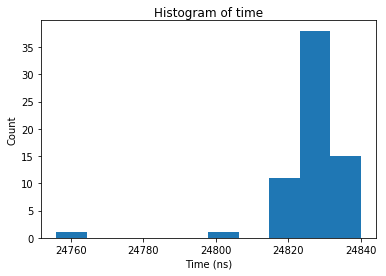

In [8]:
plt.hist(data['time']);
plt.xlabel('Time (ns)');
plt.ylabel('Count');
plt.title('Histogram of time');

Make an appropriately labeled (with units) histogram of the speed data:

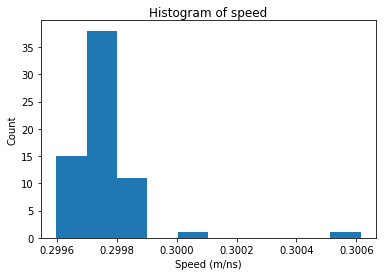

In [9]:
plt.hist(data['speed']);
plt.xlabel('Speed (m/ns)');
plt.ylabel('Count');
plt.title('Histogram of speed');

Create a new `DataFrame` named `data2` that has the outliers removed:

In [10]:
field = 'time'
mean = data[field].mean()
std = data[field].std()
outliers_std = 2
data2 = data[np.logical_and(mean - outliers_std * std < data[field], data[field] < mean + outliers_std * std)]

Make an appropriately labeled (with units) histogram of the speed data with outliers removed:

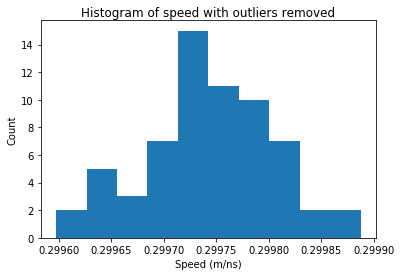

In [11]:
plt.hist(data2['speed']);
plt.xlabel('Speed (m/ns)');
plt.ylabel('Count');
plt.title('Histogram of speed with outliers removed');

## Bootstrapped mean

Here is the actual speed of light in meters/nanoseconds:

In [12]:
actual = 299792458.0*1e-9

Compute the (`n=500`) bootstrapped distribution of the mean speed of light as a NumPy array named `means`. Use the `sample` method of the Pandas `Series/DataFrame` object to do this.

In [56]:
means = np.array([data.speed.sample(n=data.speed.size, replace=True).mean() for _ in range(500)])

Make an appropriately labeled histogram of the mean distribution that includes a vertical line where the actual speed of light is. Print the mean and 95% confidence interval of this distribution. Does this experiment agree with the actual speed of light?

Mean: 0.299763633117
95% confidence: [ 0.29973664  0.29979961]


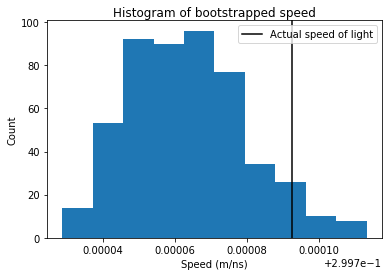

In [57]:
plt.hist(means);
plt.xlabel('Speed (m/ns)');
plt.ylabel('Count');
plt.title('Histogram of bootstrapped speed');
plt.axvline(actual, color='k')
plt.legend(['Actual speed of light']);
print("Mean:", means.mean())
print("95% confidence:", np.percentile(means, (2.5, 97.5)))